In [10]:
import numpy as np
import matplotlib.pyplot as plt


def plot_samples(samples, colors=None):
    fig, ax = plt.subplots()
    ax.grid(True)
    for key, value in samples.items():
        if colors is not None and key in colors:
            color = colors[key]
        else:
            color = 'b'
        if isinstance(value, (list, np.ndarray)):
            ax.plot(value, color=color, label=key)
        else:
            raise ValueError("Unsupported data type for sample {}".format(key))
    ax.legend()
    plt.show()


def generate_sinus(amplitude=1., frequency=1., num_points=100, xmin=0., xmax=5., noise_std=None, return_x=False):
    x = np.linspace(xmin, xmax, num_points)
    y = amplitude * np.sin(2 * np.pi * frequency * x)
    if noise_std is not None:
        noise = np.random.normal(scale=noise_std, size=num_points)
        y += noise
    if return_x:
        return x, y
    else:
        return y


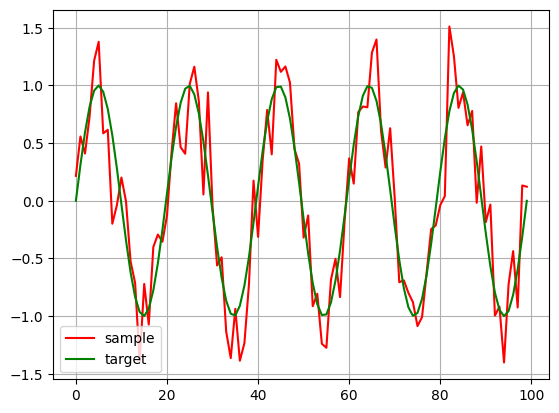

In [18]:
COLORS = {
    "sample": "r",
    "target": "g",
}

sample = generate_sinus(noise_std=0.3)
target = generate_sinus()

plot_samples(
    {
        "sample": sample,
        "target": target,
    },
    COLORS,
)

In [21]:
import torch
import torch.nn as nn


class SinFilter(nn.Module):
    def __init__(self, hidden_size=8):
        super(SinFilter, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, out_features=1)

    def forward(self, x, h=None):
        rnn_out, h = self.rnn(x, h)
        out = self.fc(rnn_out)
        return out, h

In [26]:
input = torch.from_numpy(sample).float().unsqueeze(1,).unsqueeze(0,)

model = SinFilter()
model(input)[0].shape

torch.Size([1, 100, 1])

In [27]:
input.shape

torch.Size([1, 100, 1])

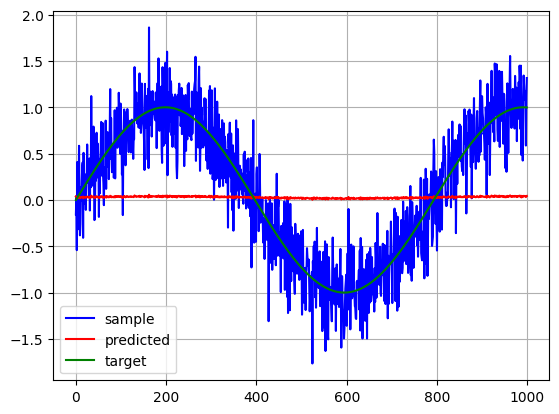

Step: 1	Loss: 0.6268683671951294
Step: 2	Loss: 0.5222978591918945
Step: 3	Loss: 0.2903561592102051
Step: 4	Loss: 1.5121650695800781
Step: 5	Loss: 0.17576822638511658


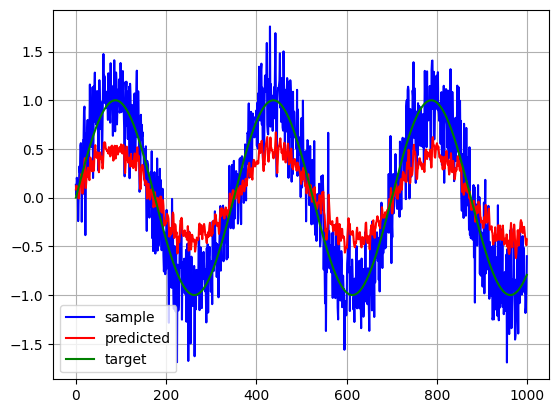

Step: 6	Loss: 0.3501374125480652
Step: 7	Loss: 0.39469221234321594
Step: 8	Loss: 0.40134021639823914
Step: 9	Loss: 0.3914761543273926
Step: 10	Loss: 0.37666505575180054


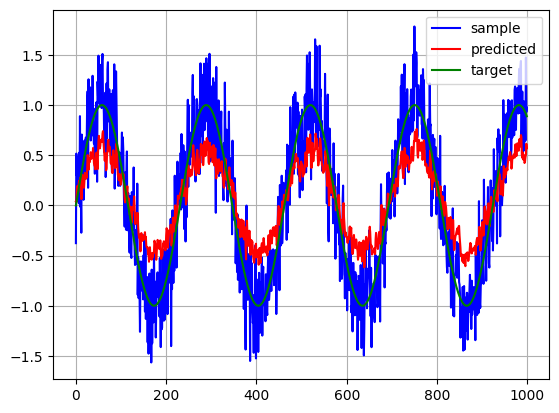

Step: 11	Loss: 0.3176024258136749
Step: 12	Loss: 0.187632218003273
Step: 13	Loss: 0.3679414987564087
Step: 14	Loss: 0.11611708253622055
Step: 15	Loss: 0.17773506045341492


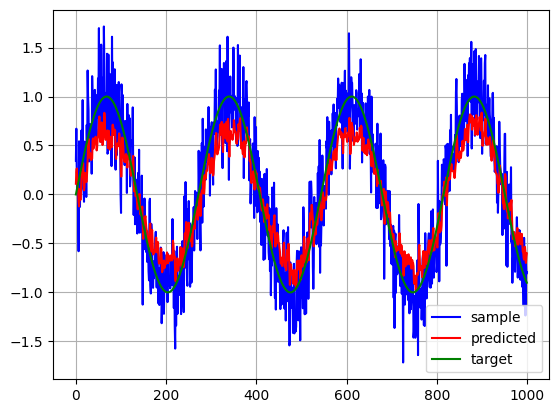

Step: 16	Loss: 0.20036812126636505
Step: 17	Loss: 0.18763047456741333
Step: 18	Loss: 0.14501851797103882
Step: 19	Loss: 0.1183878555893898
Step: 20	Loss: 0.1526370644569397


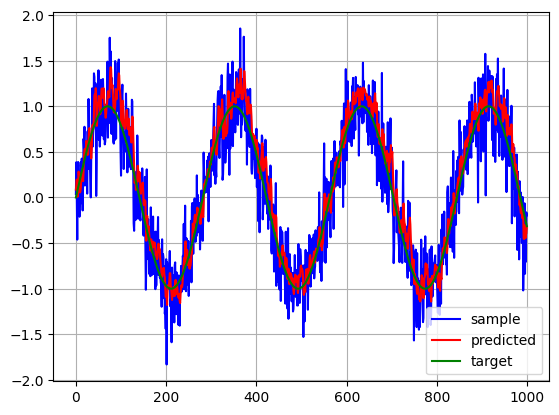

Step: 21	Loss: 0.12874819338321686
Step: 22	Loss: 0.12485793232917786
Step: 23	Loss: 0.13686074316501617
Step: 24	Loss: 0.1374005675315857
Step: 25	Loss: 0.11800827831029892


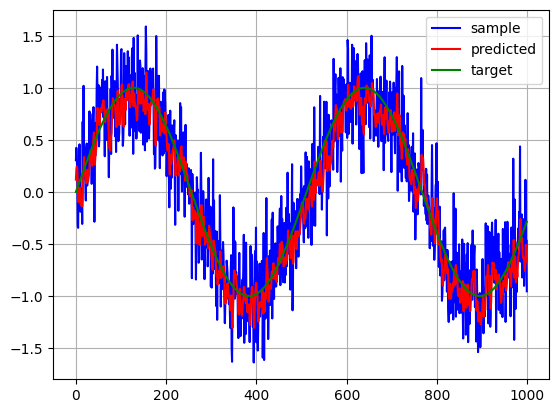

Step: 26	Loss: 0.11699190735816956
Step: 27	Loss: 0.1244761273264885
Step: 28	Loss: 0.11418283730745316
Step: 29	Loss: 0.10743660479784012
Step: 30	Loss: 0.11973283439874649


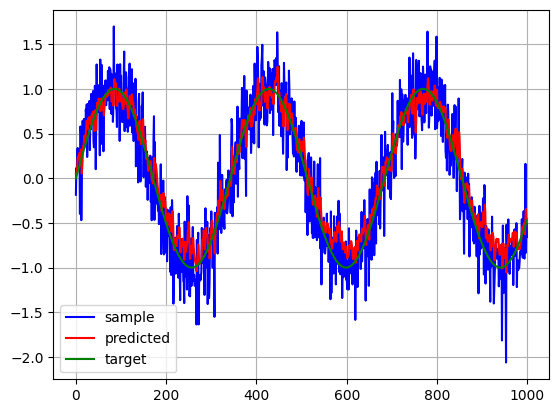

Step: 31	Loss: 0.12521333992481232
Step: 32	Loss: 0.10640979558229446
Step: 33	Loss: 0.09923999756574631
Step: 34	Loss: 0.10658363997936249
Step: 35	Loss: 0.10791000723838806


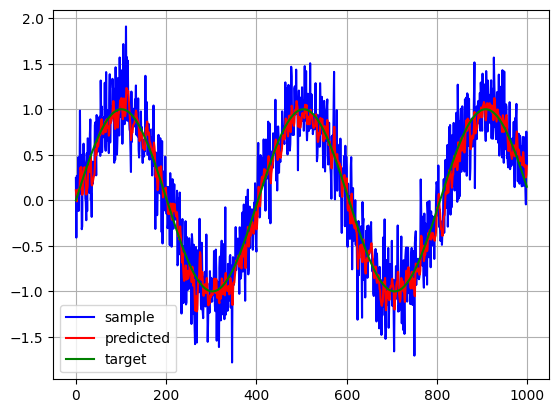

Step: 36	Loss: 0.10130487382411957
Step: 37	Loss: 0.1038370430469513
Step: 38	Loss: 0.1074172854423523
Step: 39	Loss: 0.1046738550066948
Step: 40	Loss: 0.10544760525226593


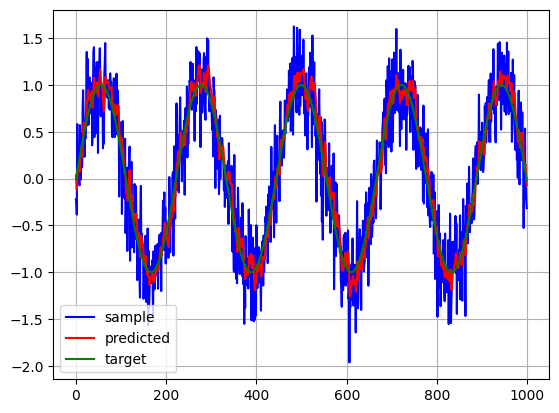

Step: 41	Loss: 0.10600762069225311
Step: 42	Loss: 0.10249350219964981
Step: 43	Loss: 0.09346579015254974
Step: 44	Loss: 0.09356898814439774
Step: 45	Loss: 0.09219763427972794


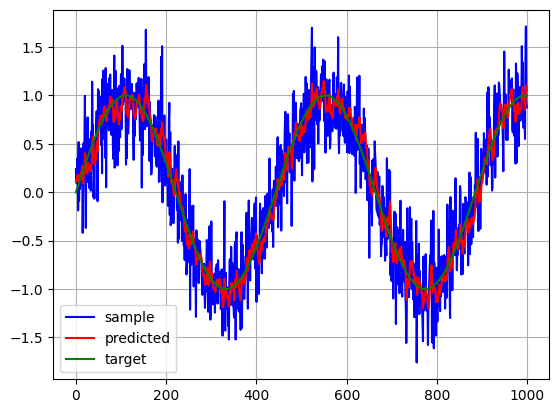

Step: 46	Loss: 0.08985695987939835
Step: 47	Loss: 0.09530739486217499
Step: 48	Loss: 0.08924329280853271
Step: 49	Loss: 0.08533257246017456
Step: 50	Loss: 0.09650106728076935


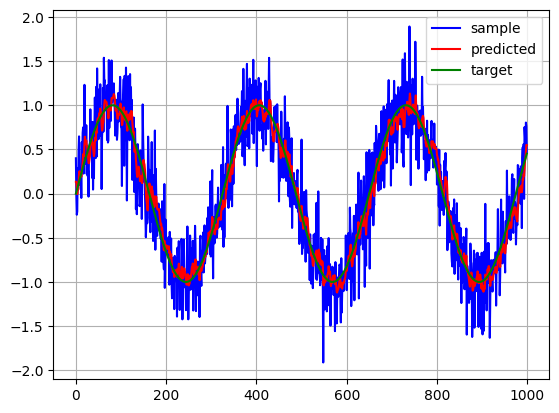

Step: 51	Loss: 0.08806310594081879
Step: 52	Loss: 0.08349613100290298
Step: 53	Loss: 0.07960687577724457
Step: 54	Loss: 0.09652221947908401
Step: 55	Loss: 0.10094399005174637


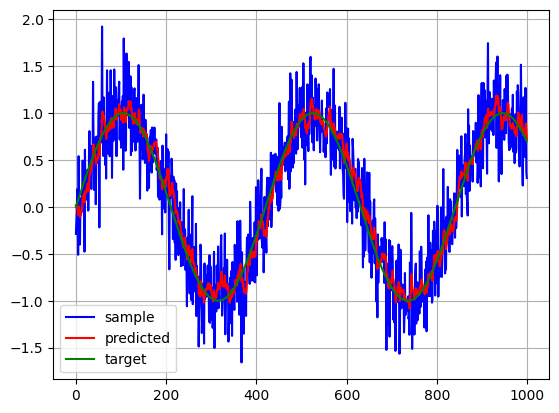

Step: 56	Loss: 0.08314866572618484
Step: 57	Loss: 0.09703712910413742
Step: 58	Loss: 0.07772650569677353
Step: 59	Loss: 0.0980236604809761
Step: 60	Loss: 0.08562924712896347


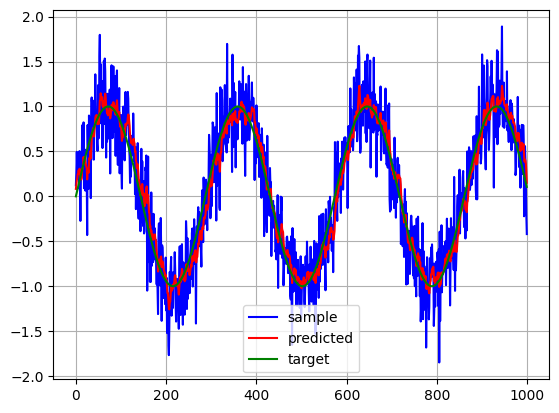

Step: 61	Loss: 0.08999551832675934
Step: 62	Loss: 0.07757701724767685
Step: 63	Loss: 0.09779172390699387
Step: 64	Loss: 0.10045381635427475
Step: 65	Loss: 0.08077912777662277


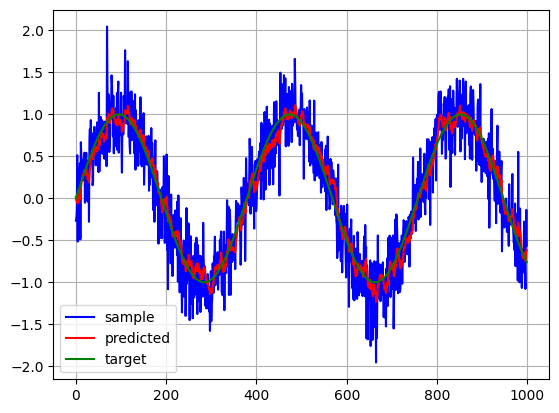

Step: 66	Loss: 0.08292548358440399
Step: 67	Loss: 0.08120305836200714
Step: 68	Loss: 0.07503364980220795
Step: 69	Loss: 0.10238046944141388
Step: 70	Loss: 0.09666004776954651


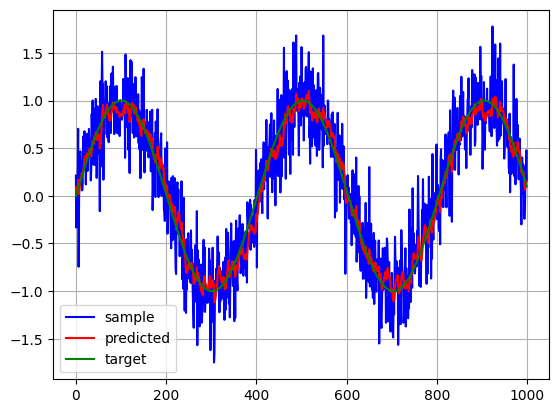

Step: 71	Loss: 0.08241110295057297
Step: 72	Loss: 0.08770029991865158
Step: 73	Loss: 0.07785715162754059
Step: 74	Loss: 0.08186386525630951
Step: 75	Loss: 0.07726086676120758


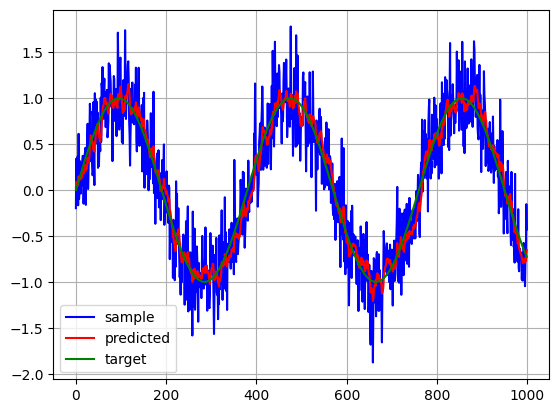

Step: 76	Loss: 0.08206584304571152
Step: 77	Loss: 0.0857825055718422
Step: 78	Loss: 0.07510253041982651
Step: 79	Loss: 0.09155956655740738
Step: 80	Loss: 0.08111488819122314


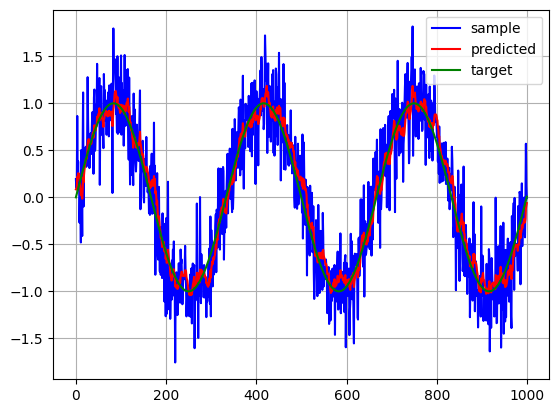

Step: 81	Loss: 0.08537264913320541
Step: 82	Loss: 0.07797874510288239
Step: 83	Loss: 0.07295889407396317
Step: 84	Loss: 0.09642457962036133
Step: 85	Loss: 0.08231651037931442


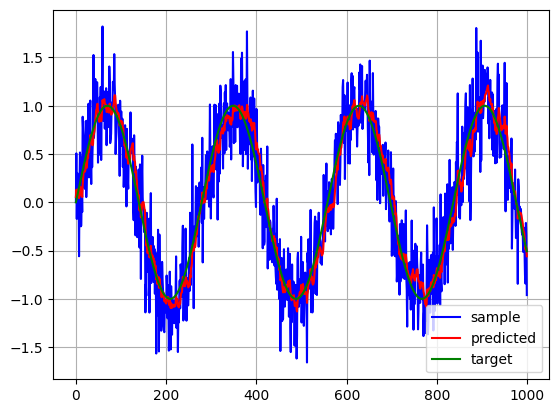

Step: 86	Loss: 0.09094896912574768
Step: 87	Loss: 0.0800701379776001
Step: 88	Loss: 0.08246750384569168
Step: 89	Loss: 0.09610451012849808
Step: 90	Loss: 0.07286528497934341


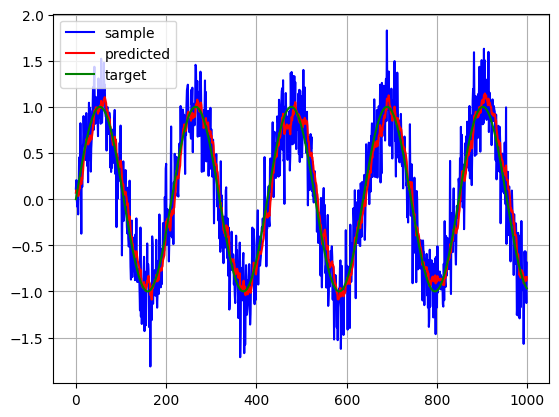

Step: 91	Loss: 0.09996265172958374
Step: 92	Loss: 0.07431599497795105
Step: 93	Loss: 0.09004496783018112
Step: 94	Loss: 0.09408533573150635
Step: 95	Loss: 0.0854455754160881


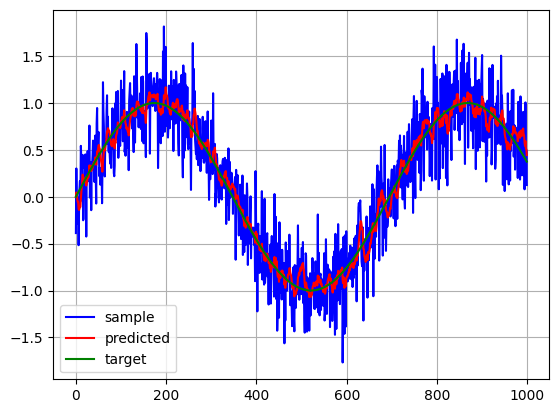

Step: 96	Loss: 0.07652828097343445
Step: 97	Loss: 0.07758406549692154
Step: 98	Loss: 0.08968973159790039
Step: 99	Loss: 0.08552157878875732
Step: 100	Loss: 0.08551044762134552


In [60]:
from numpy.random import uniform
from torch.nn import functional as F
import torch.optim as optim

step = 0
training_set_size = 100
batch_size = 64
points = 1000

model = SinFilter(hidden_size=512).to("mps")
optimizer = optim.Adam(model.parameters(), lr=0.001)

# critetion = F.mse_loss
critetion = nn.L1Loss()

for sample_idx in range(training_set_size):

    frequency = uniform(low=0.2, high=1.)

    sample_batch = []
    target_batch = []
    for i in range(batch_size):
        sample_batch.append(generate_sinus(frequency=frequency, noise_std=0.3, num_points=points))
        target_batch.append(generate_sinus(frequency=frequency, num_points=points))
    sample_batch = torch.Tensor(sample_batch).unsqueeze(-1).to("mps")
    target_batch = torch.Tensor(target_batch).unsqueeze(-1).to("mps")

    pred_batch, _ = model(sample_batch)
    loss = critetion(pred_batch, target_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 5 == 0:
        plot_samples(
            {
                "sample": sample_batch[0].detach().cpu().squeeze().numpy(),
                "predicted": pred_batch[0].detach().cpu().squeeze().numpy(),
                "target": target_batch[0].detach().cpu().squeeze().numpy(),
            },
            {
                "sample": "b",
                "predicted": "r",
                "target": "g",
            },
        )

    step += 1
    print(f"Step: {step}\tLoss: {loss.detach().cpu().numpy()}")

1.4887482207794789